# Eletromagnetismo 
### Professor Msc. Mário de Sousa Araújo Filho
### Livro Texto: 
- ### SADIKU, M. N. O. Princípios de Eletromagnetismo. 3. ed. Cap. 15

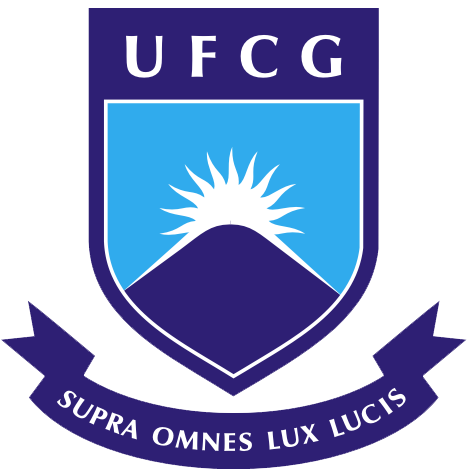

### Desenvolvido por:
-   Elmer Pimentel Farias
-   Marcelo Lessa Duarte


### Obtenha a solução da equação de Laplace para uma calha infinita com seção reta retangular mostrada na Figura 15.14.




Considere $V_1 = 10 \text{ V}$, $V_2 = 100 \text{ V}$, $V_3 = 40 \text{ V}$ e $V_4 = 0 \text{ V}$.
 
Resolução TeóricaPara resolver este problema, utilizamos a Equação de Laplace em duas dimensões (já que a calha é infinita em $z$, o potencial não varia nessa direção).


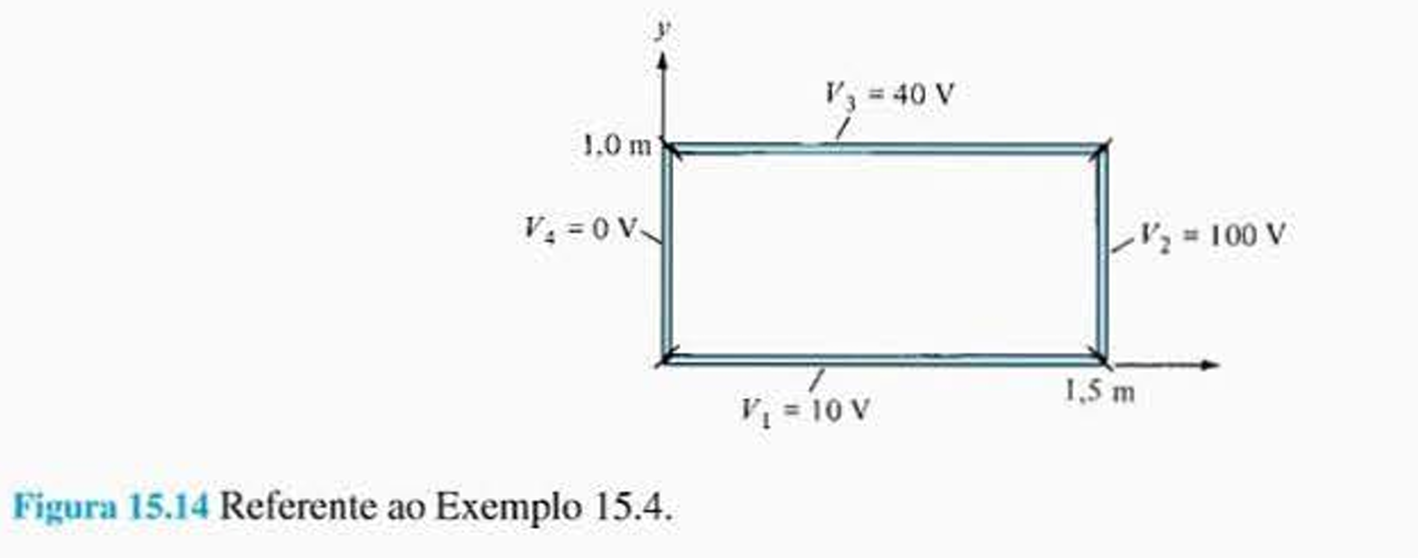


Métodos de Solução para a Equação de Laplace
Para determinar a distribuição de potencial eletrostático $V(x,y)$ em uma região livre de cargas (como a calha retangular deste problema), devemos resolver a Equação de Laplace:

$$\nabla^2 V = \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$$

Existem duas abordagens principais para resolver esta equação parcial: o Método Analítico (exato) e o Método Numérico (aproximado).

1. Método Analítico (Separação de Variáveis)Este é o método clássico encontrado em livros de texto (como Sadiku ou Hayt). Ele busca uma equação exata e contínua para $V(x,y)$ em qualquer ponto do espaço.

O Princípio: Assume-se que a solução pode ser escrita como o produto de duas funções independentes: $V(x,y) = X(x)Y(y)$.

A Solução: Geralmente resulta em uma Série de Fourier infinita. Para uma calha retangular, a solução típica tem a forma: 

$$V(x,y) = \sum_{n=1,3,5...}^{\infty} C_n \sin\left(\frac{n\pi x}{a}\right) \sinh\left(\frac{n\pi y}{a}\right)$$

Vantagem: Fornece o valor exato com precisão infinita (teoricamente).
Desvantagem: É matematicamente complexo, especialmente quando há potenciais diferentes de zero em múltiplas paredes (exige superposição de várias séries) ou geometria irregular.

2. Método Numérico (Diferenças Finitas)
Em vez de buscar uma função contínua, transformamos o espaço contínuo em uma malha discreta (grid) de pontos e resolvemos o potencial apenas nesses nós.

O Princípio: A derivada segunda é aproximada pela diferença entre pontos vizinhos na malha. A propriedade fundamental de Laplace diz que o potencial em um ponto é a média dos potenciais ao seu redor.

A Equação Discreta: 
Para um nó na posição $(i, j)$ da malha, a equação diferencial se torna uma equação algébrica simples:

$$V_{i,j} \approx \frac{1}{4} (V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1})$$

O Algoritmo de Gauss-Seidel (Usado no Código)

O código utiliza uma técnica iterativa específica chamada Gauss-Seidel:

- Chute Inicial: Começamos assumindo que todos os pontos internos são $0\text{ V}$.

- Iteração: Varremos a matriz ponto a ponto. Ao calcular o novo valor de $V_{i,j}$, já utilizamos os valores atualizados dos vizinhos (à esquerda e abaixo) calculados na mesma iteração.

- Convergência: Repetimos o processo (no código, 200 vezes) até que os valores "estabilizem" e parem de mudar significativamente.

Iniciando solver até 200 iterações...

--- Comparação de Iterações (Exemplo 15.4 - Sadiku) ---
       x      y  V (n=50)  V (n=100)  V (n=200)
0 0.5000 0.5000   20.9060    22.4444    22.4885
1 0.8000 0.8000   37.6979    38.5621    38.5862
2 1.0000 0.5000   41.8345    43.1859    43.2228
3 0.8000 0.2000   19.8685    20.9417    20.9715


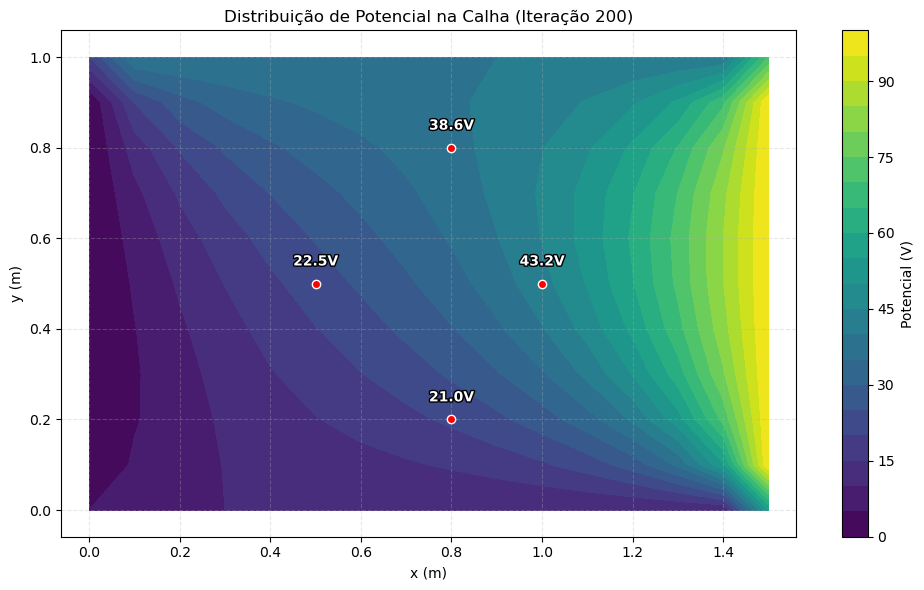

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as pe

# --- Parâmetros do Exemplo 15.4 ---
V1 = 10.0   # Fundo (y=0)
V2 = 100.0  # Direita (x=1.5)
V3 = 40.0   # Topo (y=1.0)
V4 = 0.0    # Esquerda (x=0)

# Dimensões e passo
Lx = 1.5
Ly = 1.0
h = 0.1

nx = int(Lx / h) + 1  # 16 pontos
ny = int(Ly / h) + 1  # 11 pontos

# Pontos de verificação (x, y) que queremos monitorar
check_points = [
    (0.5, 0.5),
    (0.8, 0.8),
    (1.0, 0.5),
    (0.8, 0.2)
]

# Marcos de iteração que queremos registrar na tabela
iteration_checkpoints = [50, 100, 200]
max_iter = max(iteration_checkpoints)

# --- Inicialização ---
V = np.zeros((nx, ny))

# Condições de Contorno
V[:, 0] = V1         # Fundo
V[:, ny-1] = V3      # Topo
V[0, :] = V4         # Esquerda
V[nx-1, :] = V2      # Direita

# Cantos (Média dos lados adjacentes)
V[0, 0] = 0.5 * (V1 + V4)
V[nx-1, 0] = 0.5 * (V1 + V2)
V[0, ny-1] = 0.5 * (V3 + V4)
V[nx-1, ny-1] = 0.5 * (V2 + V3)

# Dicionário para guardar o histórico dos valores
# Chaves serão as iterações (50, 100, etc.), valores serão listas de potenciais
history = {iter_num: [] for iter_num in iteration_checkpoints}

# --- Solver Iterativo (Gauss-Seidel) ---
print(f"Iniciando solver até {max_iter} iterações...")

# Loop principal: vai de 1 até 200
for k in range(1, max_iter + 1):
    
    # Atualiza apenas pontos internos
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            V[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
            
    # SE o contador 'k' for um dos marcos (50, 100, 200), salvamos os dados atuais
    if k in iteration_checkpoints:
        current_vals = []
        for x_coord, y_coord in check_points:
            # Converte coordenada física para índice da matriz
            i_idx = int(round(x_coord / h))
            j_idx = int(round(y_coord / h))
            current_vals.append(V[i_idx, j_idx])
        
        history[k] = current_vals

# --- Organização dos Resultados na Tabela ---
# Estrutura base com as coordenadas
data = {
    'x': [p[0] for p in check_points],
    'y': [p[1] for p in check_points]
}

# Adiciona as colunas de iteração dinamicamente
for k in iteration_checkpoints:
    data[f'V (n={k})'] = history[k]

# Cria o DataFrame e formata
df_results = pd.DataFrame(data)
pd.options.display.float_format = '{:.4f}'.format

print("\n--- Comparação de Iterações (Exemplo 15.4 - Sadiku) ---")
print(df_results)

# --- Visualização (Estado Final n=200) ---
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)
V_plot = V.T  # Transpor para plotar corretamente (y nas linhas)

plt.figure(figsize=(10, 6))
# Usando 'viridis' ou 'jet' para contraste
cp = plt.contourf(X, Y, V_plot, 20, cmap='viridis') 
cbar = plt.colorbar(cp)
cbar.set_label('Potencial (V)')

# Plotar os pontos de interesse no gráfico
for idx, row in df_results.iterrows():
    plt.plot(row['x'], row['y'], 'ro', markersize=6, markeredgecolor='white')
    # Texto com contorno para melhor leitura
    plt.text(row['x'], row['y'] + 0.04, f"{row[f'V (n={max_iter})']:.1f}V", 
             color='white', fontweight='bold', ha='center', 
             path_effects=[pe.withStroke(linewidth=2, foreground="black")])

plt.title(f'Distribuição de Potencial na Calha (Iteração {max_iter})')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.axis('equal') # Garante proporção real 1:1
plt.tight_layout()

plt.show()

Starting iterative solver with 200 iterations...


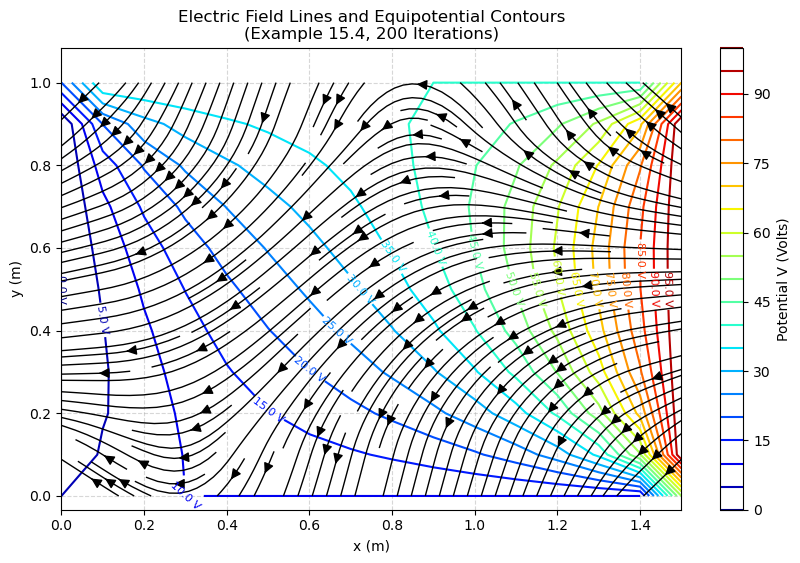

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters from Example 15.4 ---
# Boundary Potentials
V1 = 10.0   # Bottom (y=0)
V2 = 100.0  # Right side (x=1.5)
V3 = 40.0   # Top (y=1.0)
V4 = 0.0    # Left side (x=0)

# Grid dimensions
Lx = 1.5  # Width
Ly = 1.0  # Height
h = 0.1   # Step size

# Number of grid points (including boundaries)
# nx corresponds to x-direction (0 to 1.5), ny to y-direction (0 to 1.0)
nx = int(Lx / h) + 1  # 16 points
ny = int(Ly / h) + 1  # 11 points
ni = 200              # Number of iterations (using the final converged state)

# --- Initialization ---
# Initialize potential grid V(x,y) with zeros
# We use shape (nx, ny) so V[i, j] corresponds to x[i] and y[j]
V = np.zeros((nx, ny))

# --- Set Boundary Conditions ---
# Bottom Boundary (j=0)
V[:, 0] = V1

# Top Boundary (j=ny-1)
V[:, ny-1] = V3

# Left Boundary (i=0)
V[0, :] = V4

# Right Boundary (i=nx-1)
V[nx-1, :] = V2

# Handle Corners (Average of adjacent sides)
V[0, 0] = 0.5 * (V1 + V4)         # Bottom-Left
V[nx-1, 0] = 0.5 * (V1 + V2)      # Bottom-Right
V[0, ny-1] = 0.5 * (V3 + V4)      # Top-Left
V[nx-1, ny-1] = 0.5 * (V2 + V3)   # Top-Right

# --- Iterative Solver (Gauss-Seidel) ---
print(f"Starting iterative solver with {ni} iterations...")

for k in range(ni):
    # Iterate over interior points only
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            # Finite Difference Equation (Average of 4 neighbors)
            V[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])

# --- Electric Field Calculation ---
# E = -grad(V)
# Ex = -dV/dx, Ey = -dV/dy
# Using central difference for interior points:
# dV/dx at (i,j) approx (V[i+1, j] - V[i-1, j]) / (2*h)
# dV/dy at (i,j) approx (V[i, j+1] - V[i, j-1]) / (2*h)

Ex = np.zeros((nx, ny))
Ey = np.zeros((nx, ny))

for i in range(1, nx-1):
    for j in range(1, ny-1):
        Ex[i, j] = -(V[i+1, j] - V[i-1, j]) / (2 * h)
        Ey[i, j] = -(V[i, j+1] - V[i, j-1]) / (2 * h)

# For boundaries, we can use forward/backward differences, or just neglect them for plotting streamlines
# Let's neglect them for now as streamplot handles it reasonably well.
# We need to transpose V, Ex, Ey for meshgrid plotting (ny, nx)

V_plot = V.T
Ex_plot = Ex.T
Ey_plot = Ey.T

# --- Visualization ---
# Create coordinate matrices for plotting
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 6))

# Plot Potential Contour (Equipotential Lines)
# Using fewer levels for clarity when combined with field lines
cp = plt.contour(X, Y, V_plot, 20, cmap='jet', linewidths=1.5)
plt.clabel(cp, inline=True, fontsize=8, fmt='%1.1f V')
cbar = plt.colorbar(cp)
cbar.set_label('Potential V (Volts)')

# Plot Electric Field Lines (Streamlines)
# streamplot(X, Y, U, V) where U is x-component, V is y-component
# X, Y are 2D arrays from meshgrid.
# Ex_plot and Ey_plot must match the shape of X and Y (ny, nx)
st = plt.streamplot(X, Y, Ex_plot, Ey_plot, color='k', linewidth=1, density=1.5, arrowsize=1.5)

plt.title(f'Electric Field Lines and Equipotential Contours\n(Example 15.4, {ni} Iterations)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.savefig('example_15_4_E_field.png')
plt.show()